In [1]:
from project.survey.survey import SurveyReader
from project.constants import DATA_DIR, STUDY_YEARS

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

survey = SurveyReader(DATA_DIR, include_years=STUDY_YEARS)
survey.read_files()

In [2]:
q_names_01 = [
    "P1121", # Electric grid
    "P1141", # House has landline
    "P1142", # Owns Cell phone at home
    "P1144",  # Has Internet connection
    "P1145", # Does NOT have phone/pc/internet
    "RESULT",
]
module_01 = survey.data_columns("01", q_names_01, include_demographics=False)
module_01["has_landline"] = module_01["P1141"] == 1
module_01["cellphone_at_home"] = module_01["P1142"] == 1
module_01["home_internet_connection"] = module_01["P1144"] == 1
module_01["no_computer"] = module_01["P1145"] == 1
module_01

,P1121,P1141,P1142,P1144,P1145,RESULT,HOUSE_KEY,has_landline,cellphone_at_home,home_internet_connection,no_computer
0,1.0,0.0,1.0,1.0,0.0,1.0,20230100503000211,False,True,True,False
1,1.0,0.0,1.0,1.0,0.0,1.0,20230100503001111,False,True,True,False
2,1.0,0.0,1.0,1.0,0.0,1.0,20230100503003711,False,True,True,False
3,1.0,0.0,1.0,1.0,0.0,1.0,20230100503004511,False,True,True,False
4,1.0,0.0,1.0,1.0,0.0,1.0,20230100503005611,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
44373,1.0,0.0,1.0,1.0,0.0,1.0,20231202067006511,False,True,True,False
44374,1.0,0.0,1.0,1.0,0.0,1.0,20231202067006611,False,True,True,False
44375,1.0,0.0,1.0,1.0,0.0,1.0,20231202067006711,False,True,True,False
44376,1.0,0.0,1.0,1.0,0.0,1.0,20231202067006811,False,True,True,False


In [3]:
"P507" # Type of work
"""
Ud. se desempeño en su ocupación principal o negocio como:
1. Empleador o patrono
2. Trabajador Independiente
3. Empleado
4. Obrero
5. Trabajador Familiar No Remunerado
6. Trabajador del Hogar
7. Otro
Rango 1-7
"""
"""
P501
La semana pasada, del ... al ..., ¿Tuvo Ud. algún trabajo? (Sin contar los quehaceres
del hogar)
1. Si
2. No
9 Missing

P502
Aunque no trabajó la semana pasada, ¿Tiene algún empleo fijo al que próximamente
volverá?
1. Si
2. No
9 Missing value

P503
Aunque no trabajó la semana pasada, ¿Tiene algún negocio propio al que
próximamente volverá?
1. Si
2. No
9 Missing value

"""

'\nP501\nLa semana pasada, del ... al ..., ¿Tuvo Ud. algún trabajo? (Sin contar los quehaceres\ndel hogar)\n1. Si\n2. No\n9 Missing\n\nP502\nAunque no trabajó la semana pasada, ¿Tiene algún empleo fijo al que próximamente\nvolverá?\n1. Si\n2. No\n9 Missing value\n\nP503\nAunque no trabajó la semana pasada, ¿Tiene algún negocio propio al que\npróximamente volverá?\n1. Si\n2. No\n9 Missing value\n\n'

In [4]:
q_names_18 = [
    "P612N",  # Home equipment type
    "P612",  # Home equipment has
]
equipment = survey.data_columns("18", q_names_18, include_demographics=False)
equipment["has_radio_tv"] = (equipment["P612N"] <= 3) & (equipment["P612"] == 1)
equipment["has_computer"] = (equipment["P612N"] == 7) & (equipment["P612"] == 1)
aggregations_18 = {"has_radio_tv": "any", "has_computer": "any"}
equipment_per_house = pd.DataFrame(equipment.groupby("HOUSE_KEY").agg(aggregations_18))
equipment_per_house

,has_radio_tv,has_computer
HOUSE_KEY,,
20230100503000211,True,False
20230100503001111,True,False
20230100503003711,True,False
20230100503004511,True,False
20230100503005611,True,True
...,...,...
20231202067006511,True,False
20231202067006611,False,True
20231202067006711,True,False


In [5]:
SUMMARY_FIELDS = [
    "POBREZA", 
    "INGHOG2D", # House net income
    "LINPE", 
    "LINEA", 
    "ESTRSOCIAL",
    "MIEPERHO", # Number of people in household
    "FACTOR07"
]
poverty = survey.data_columns("34", SUMMARY_FIELDS, include_demographics=False)
len(poverty)

33886

In [6]:
house_data = pd.merge(poverty, equipment_per_house, on=["HOUSE_KEY"], how="left")
house_data = pd.merge(module_01, house_data, on=["HOUSE_KEY"], how="left")
house_data[house_data["RESULT"] == 1]

,P1121,P1141,P1142,P1144,P1145,RESULT,HOUSE_KEY,has_landline,cellphone_at_home,home_internet_connection,no_computer,POBREZA,INGHOG2D,LINPE,LINEA,ESTRSOCIAL,MIEPERHO,FACTOR07,has_radio_tv,has_computer
0,1.0,0.0,1.0,1.0,0.0,1.0,20230100503000211,False,True,True,False,3.0,61138.316406,244.489227,401.320129,4.0,4.0,118.374542,True,False
1,1.0,0.0,1.0,1.0,0.0,1.0,20230100503001111,False,True,True,False,3.0,75288.875000,244.489227,401.320129,4.0,3.0,118.374542,True,False
2,1.0,0.0,1.0,1.0,0.0,1.0,20230100503003711,False,True,True,False,3.0,28432.517578,244.489227,401.320129,4.0,4.0,118.374542,True,False
3,1.0,0.0,1.0,1.0,0.0,1.0,20230100503004511,False,True,True,False,3.0,36355.707031,244.489227,401.320129,4.0,2.0,118.374542,True,False
4,1.0,0.0,1.0,1.0,0.0,1.0,20230100503005611,False,True,True,False,3.0,50284.789062,244.489227,401.320129,4.0,1.0,118.374542,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44373,1.0,0.0,1.0,1.0,0.0,1.0,20231202067006511,False,True,True,False,3.0,17124.578125,217.144974,322.850830,6.0,1.0,65.991585,True,False
44374,1.0,0.0,1.0,1.0,0.0,1.0,20231202067006611,False,True,True,False,3.0,41055.328125,217.144974,322.850830,6.0,5.0,65.991585,False,True
44375,1.0,0.0,1.0,1.0,0.0,1.0,20231202067006711,False,True,True,False,3.0,26894.705078,217.144974,322.850830,6.0,5.0,65.991585,True,False
44376,1.0,0.0,1.0,1.0,0.0,1.0,20231202067006811,False,True,True,False,3.0,9677.001953,217.144974,322.850830,6.0,1.0,65.991585,False,False


In [7]:
q_names_02 = [
    "P207",  # Gender (1- Male, 2- Female)
    "P208A", # Age
]
module_02 = survey.data_columns("02", q_names_02)
module_02["internet_access"] = module_02["P208A"] >= 14  # Older than 14 access internet
module_02

,AÑO,MES,UBIGEO,CONGLOME,VIVIENDA,HOGAR,DOMINIO,ESTRATO,CODPERSO,P207,P208A,HOUSE_KEY,PERSON_KEY,PERIODO,RURAL,internet_access
0,2023,02,010101,005007,022,11,4.0,4.0,01,1.0,64.0,20230200500702211,2023020050070221101,202302,False,True
1,2023,02,010101,005007,022,11,4.0,4.0,02,2.0,63.0,20230200500702211,2023020050070221102,202302,False,True
2,2023,02,010101,005007,022,11,4.0,4.0,03,1.0,31.0,20230200500702211,2023020050070221103,202302,False,True
3,2023,02,010101,005007,031,11,4.0,4.0,01,2.0,79.0,20230200500703111,2023020050070311101,202302,False,True
4,2023,02,010101,005007,031,11,4.0,4.0,02,1.0,50.0,20230200500703111,2023020050070311102,202302,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119742,2023,04,210903,021001,060,11,6.0,8.0,02,2.0,88.0,20230402100106011,2023040210010601102,202304,True,True
119743,2023,04,210903,021001,060,11,6.0,8.0,03,2.0,46.0,20230402100106011,2023040210010601103,202304,True,True
119744,2023,04,210903,021001,063,11,6.0,8.0,01,2.0,81.0,20230402100106311,2023040210010631101,202304,True,True
119745,2023,04,210903,021001,064,11,6.0,8.0,01,1.0,50.0,20230402100106411,2023040210010641101,202304,True,True


In [8]:
# Join demographics module(per person) with house data
# This assings each individual with their per-home information
person_data = pd.merge(module_02, house_data, on=["HOUSE_KEY"], how="left")
person_data

,AÑO,MES,UBIGEO,CONGLOME,VIVIENDA,HOGAR,DOMINIO,ESTRATO,CODPERSO,P207,...,no_computer,POBREZA,INGHOG2D,LINPE,LINEA,ESTRSOCIAL,MIEPERHO,FACTOR07,has_radio_tv,has_computer
0,2023,02,010101,005007,022,11,4.0,4.0,01,1.0,...,False,3.0,88200.093750,227.616226,375.507629,4.0,3.0,50.466671,True,True
1,2023,02,010101,005007,022,11,4.0,4.0,02,2.0,...,False,3.0,88200.093750,227.616226,375.507629,4.0,3.0,50.466671,True,True
2,2023,02,010101,005007,022,11,4.0,4.0,03,1.0,...,False,3.0,88200.093750,227.616226,375.507629,4.0,3.0,50.466671,True,True
3,2023,02,010101,005007,031,11,4.0,4.0,01,2.0,...,False,3.0,140989.609375,227.616226,375.507629,4.0,1.0,50.466671,True,True
4,2023,02,010101,005007,031,11,4.0,4.0,02,1.0,...,False,3.0,140989.609375,227.616226,375.507629,4.0,1.0,50.466671,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119742,2023,04,210903,021001,060,11,6.0,8.0,02,2.0,...,True,2.0,3718.296387,217.144974,339.377441,6.0,2.0,337.350189,True,False
119743,2023,04,210903,021001,060,11,6.0,8.0,03,2.0,...,True,2.0,3718.296387,217.144974,339.377441,6.0,2.0,337.350189,True,False
119744,2023,04,210903,021001,063,11,6.0,8.0,01,2.0,...,True,3.0,3942.827148,217.144974,339.377441,6.0,1.0,337.350189,False,False
119745,2023,04,210903,021001,064,11,6.0,8.0,01,1.0,...,False,3.0,22824.558594,217.144974,339.377441,6.0,2.0,337.350189,True,False


In [9]:
q_names_03 = [
    "P302",  # Can read/write?
    # Internet use
    "P314A",  # Used internet in the last month
    "P314B$1",  # Used internet at home
    "P314B$2",  # Used internet at work
    "P314B$3",  # Used internet in school
    "P314B$4",  # Used internet in telecenter
    "P314B$5",  # Used internet in someone else's house
    
    # Internet use purpose
    "P316$1", # Used internet for retrieve information
    "P316$2", # Used internet for communication
    "P316$3", # Used internet for purchase
    "P316$4", # Used internet for banking
    "P316$5", # Used internet for education
    "P316$6", # Used internet for transactions
    "P316$7", # Used internet for entertainment
    "P316$8", # Used internet for sales
    
    # Education
    "P301A", # Max education level achieved,
]

In [10]:
internet_qs = survey.data_columns("03", q_names_03, include_demographics=False)
# internet_qs["uses_telecenter"] = (internet_qs["P314B$4"] == 4) & (internet_qs["P314A"] == 1)
# internet_qs["home_internet"] = internet_qs["P314B$1"] == 1
internet_qs

,P302,P314A,P314B$1,P314B$2,P314B$3,P314B$4,P314B$5,P316$1,P316$2,P316$3,P316$4,P316$5,P316$6,P316$7,P316$8,P301A,HOUSE_KEY,PERSON_KEY
0,NaN,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,8.0,20230100503000211,2023010050300021101
1,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,10.0,20230100503000211,2023010050300021102
2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,20230100503000211,2023010050300021103
3,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,20230100503000211,2023010050300021104
4,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,20230100503001111,2023010050300111101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108349,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20231202067006711,2023120206700671105
108350,NaN,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,20231202067006811,2023120206700681101
108351,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,20231202067006911,2023120206700691101
108352,NaN,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,20231202067006911,2023120206700691102


In [11]:
person_data = pd.merge(person_data, internet_qs, on=["HOUSE_KEY", "PERSON_KEY"], how="right")
person_data

,AÑO,MES,UBIGEO,CONGLOME,VIVIENDA,HOGAR,DOMINIO,ESTRATO,CODPERSO,P207,...,P314B$5,P316$1,P316$2,P316$3,P316$4,P316$5,P316$6,P316$7,P316$8,P301A
0,2023,01,010201,005030,002,11,7.0,4.0,01,1.0,...,0.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,8.0
1,2023,01,010201,005030,002,11,7.0,4.0,02,2.0,...,0.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,10.0
2,2023,01,010201,005030,002,11,7.0,4.0,03,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,2023,01,010201,005030,002,11,7.0,4.0,04,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,2023,01,010201,005030,011,11,7.0,4.0,01,1.0,...,0.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108349,2023,12,010503,020670,067,11,4.0,8.0,05,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
108350,2023,12,010503,020670,068,11,4.0,8.0,01,1.0,...,0.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0
108351,2023,12,010503,020670,069,11,4.0,8.0,01,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
108352,2023,12,010503,020670,069,11,4.0,8.0,02,2.0,...,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0


In [12]:
# This column indicates the household yearly income for each individual
# We want to remove the high outliers from the sample
income_outlier = person_data["INGHOG2D"].quantile(0.99)

# Filter out people that did NOT answer module 03 about internet use.
# This `answers` view of the combined dataframe will contain the rows for our analysis
sample = person_data[
    # Complete survey
    (person_data["RESULT"] == 1) &
    # Remove missing gender
    (person_data["P207"].notna()) &
    # Remove missing age
    (person_data["P208A"].notna()) &
    # People over 13
    (person_data["P208A"] > 13) &
    # People that answered about internet usage
    (~person_data["P314A"].isnull()) &
    # Remove income outliers
    (person_data["INGHOG2D"] < income_outlier) & (person_data["INGHOG2D"] > 0) &
    # No answer on education
    (person_data["P301A"].notnull()) &
    # For syntax ease that every other condition end sin &
    (1==1)
]
# What % of total responses we keep as full answers
100*len(sample)/len(person_data), income_outlier, person_data["INGHOG2D"].max(), len(person_data), len(sample), len(person_data)- len(sample)

(65.62655739520461, 185009.2482812506, 818760.0, 108354, 71109, 37245)

In [13]:
inputs = pd.DataFrame({
    "house_income": sample["INGHOG2D"],
    "log_income": np.log(sample["INGHOG2D"])/np.log(10),
    "rural": pd.Categorical(sample["RURAL"].astype(int) + 1),
    "gender": pd.Categorical(sample["P207"].astype(int)),
    "age": sample["P208A"].astype(int),
    "education": pd.Categorical(sample["P301A"].astype(int), ordered=True),
    "electric_grid": pd.Categorical(sample["P1121"].astype(int) + 1),
    "social_level": pd.Categorical(sample["ESTRSOCIAL"].astype(int), ordered=True),
    "domain": pd.Categorical(sample["DOMINIO"].astype(int)),
    "poor": pd.Categorical(sample["POBREZA"].astype(int))
})
# inputs.dtypes
len(inputs), len(inputs[inputs["social_level"].isnull()])

(71109, 0)

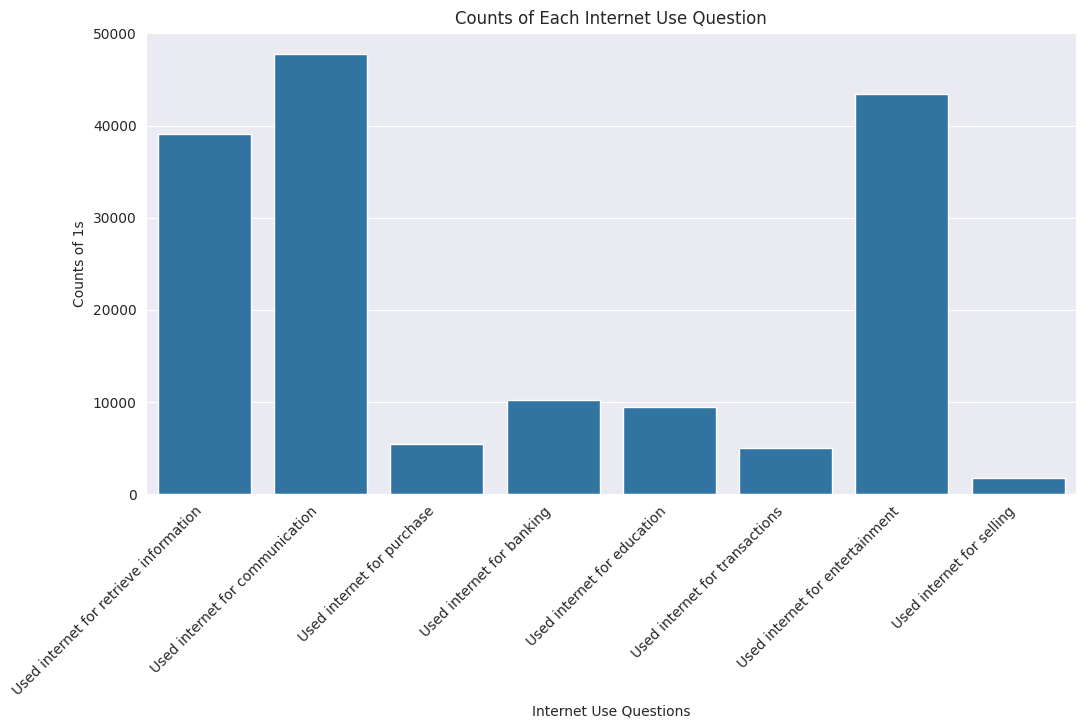

,0
Used internet for retrieve information,39127
Used internet for communication,47738
Used internet for purchase,5430
Used internet for banking,10187
Used internet for education,9517
Used internet for transactions,5056
Used internet for entertainment,43401
Used internet for selling,1744


In [14]:
internet_use_questions = {
    "P316$1": "Used internet for retrieve information",
    "P316$2": "Used internet for communication",
    "P316$3": "Used internet for purchase",
    "P316$4": "Used internet for banking",
    "P316$5": "Used internet for education",
    "P316$6": "Used internet for transactions",
    "P316$7": "Used internet for entertainment",
    "P316$8": "Used internet for selling"
}

# Count the occurrences of 1 for each column
counts = sample[list(internet_use_questions.keys())].apply(lambda col: (col == 1).sum())
counts.index = [internet_use_questions[col] for col in counts.index]
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Internet Use Questions')
plt.ylabel('Counts of 1s')
plt.title('Counts of Each Internet Use Question')
plt.xticks(rotation=45, ha='right')
plt.show()
pd.DataFrame(counts)

In [15]:
has_basic_appliances = sample["has_radio_tv"] | sample["has_landline"]
basic_ict_use = (sample["P316$1"] == 1) | (sample["P316$2"] == 1)| (sample["P316$7"] == 1)
advanced_ict_use = (sample["P316$3"] == 1) | (sample["P316$4"] == 1) | (sample["P316$5"] == 1) | (sample["P316$6"] == 1)  | (sample["P316$8"] == 1)
selections = [
    # Extremely digitally poor
    (has_basic_appliances == False) & (basic_ict_use == False) & (advanced_ict_use == False),
    # Digitally poor
    (has_basic_appliances == True) & (basic_ict_use == False) & (advanced_ict_use == False),
    # Connected
    (basic_ict_use == True) & (advanced_ict_use == False),
    # Digitally wealthy
    advanced_ict_use == True,
]
choices = [1, 2, 3, 4]
# choices.reverse()
# selections.reverse()
digital_poor = np.select(selections, choices, default=0)

# person_data["has_basic_appliances"] = has_basic_appliances
# person_data["basic_ict_use"] = basic_ict_use
# person_data["advanced_ict_use"] = advanced_ict_use
inputs["digital_poor"] = pd.Categorical(digital_poor.astype(int), ordered=True)


In [16]:
# Region grouping
_D, _R = sample["DOMINIO"], sample["RURAL"]
conditions = [
    # Costa Urbana
    ~_R & ((_D == 1) | (_D == 2) | (_D == 3)),
    # Costa Rural
    _R & ((_D == 1) | (_D == 2) | (_D == 3)),
    # Sierra Urbana
    ~_R & ((_D == 4) | (_D == 5) | (_D == 6)),
    # Sierra Rural
    _R & ((_D == 4) | (_D == 5) | (_D == 6)),
    # Selva Urbana
    ~_R & (_D == 7),
    # Selva Rural
    _R & (_D == 7),
    # Lima metropolitana
    _D == 8,
]
choices = [1, 2, 3, 4, 5, 6, 7]
region= np.select(conditions, choices, default=0)
inputs["region"] = pd.Categorical(region.astype(int))

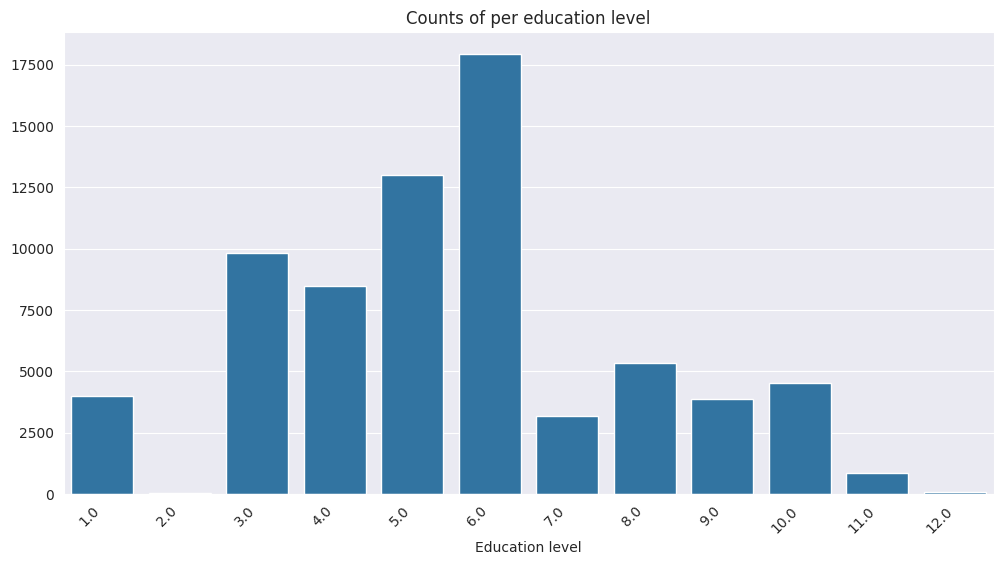

,count
P301A,
6.0,17932
5.0,12989
3.0,9810
4.0,8495
8.0,5342
10.0,4509
1.0,3988
9.0,3870
7.0,3181


In [17]:
educ = sample["P301A"]
education_labels = [
"no_education", # "Sin nivel",
"preschool", # "Educación inicial",

"incomplete_primary", # "Primaria Incompleta",
"complete_primary", # "Primaria completa",

"incomplete_highschool", # "Secundaria incompleta",
"complete_highschool", # "Secundaria completa",

"incomplete_non_university", # "Superior no universitaria Incompleta",
"complete_non_university", # "Superior no universitaria completa",

"incomplete_university", # "Superior universitaria incompleta",
"complete_university", # "Superior universitaria completa",

"postgrad", # "Maestria/Doctorado",
"special_basic", # "Básica especial",
]

educ_counts = educ.value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=educ_counts.index, y=educ_counts.values)
plt.xlabel('Education level')
plt.title('Counts of per education level')
plt.xticks(rotation=45, ha='right')
plt.show()
pd.DataFrame(educ_counts)

Text(0.5, 1.0, 'Distribution of Educ Recode Values (Ascending Order)')

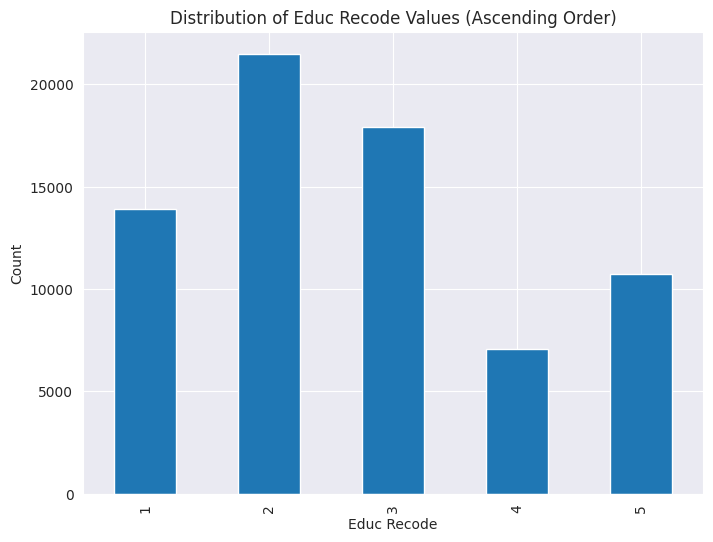

In [18]:
# Education data

labels = {el: int(p) for p, el in enumerate(education_labels, 1)}
education_selections = [
    # Incomplete primary of less
    (educ == labels["no_education"]) | (educ == labels["preschool"]) | (educ == labels["incomplete_primary"]) | (educ == labels["special_basic"]),
    # Complete primary
    (educ == labels["complete_primary"]) | (educ == labels["incomplete_highschool"]),
    # Complete secondary
    (educ == labels["complete_highschool"]),
    # Finished high-school, incomplete university
    (educ == labels["incomplete_university"]) | (educ == labels["incomplete_non_university"]),
    # Finished university or postgraduate
    (educ == labels["complete_university"]) | (educ == labels["postgrad"]) | (educ == labels["complete_non_university"]),
]
education_choices = [1, 2, 3, 4, 5]
educ_recode = np.select(education_selections, education_choices, default=0)
inputs["educ_recode"] = pd.Categorical(educ_recode.astype(int), ordered=True)
# person_data[["educ_recode", "P301A"]]
len(inputs[inputs["educ_recode"].isnull()])
educ_recode_counts = inputs['educ_recode'].value_counts().sort_index(ascending=True)

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
educ_recode_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Educ Recode')
plt.ylabel('Count')
plt.title('Distribution of Educ Recode Values (Ascending Order)')

In [19]:
# Literacy columns
illiterate = ~(sample["P302"] != 2)
inputs["illiterate"] = pd.Categorical(illiterate.astype(int) + 1)

Text(0.5, 1.0, 'Distribution of Income Cats Values (Ascending Order)')

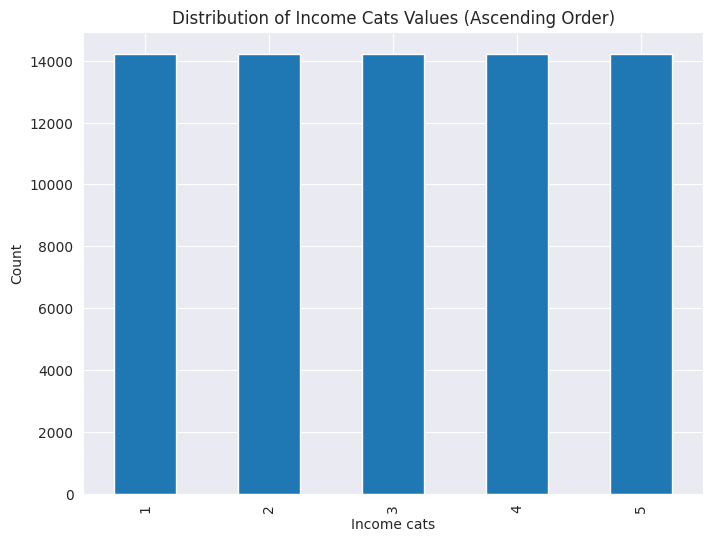

In [20]:
# Income data
income = inputs["house_income"]
log_income = np.log(income)/np.log(10)
income_col = income

income_quantiles = dict(income_col.quantile([0.2, 0.4, 0.6, 0.8]))
income_selections = [
    (income_col >= 0) & (income_col < income_quantiles[0.2]),
    (income_col >= income_quantiles[0.2]) & (income_col < income_quantiles[0.4]),
    (income_col >= income_quantiles[0.4]) & (income_col < income_quantiles[0.6]),
    (income_col >= income_quantiles[0.6]) & (income_col < income_quantiles[0.8]),
    (income_col >= income_quantiles[0.8]),
]
income_choices = [1, 2, 3, 4, 5]
income_categories = np.select(income_selections, income_choices, default=0)
inputs["income_categories"] = pd.Categorical(income_categories.astype(int), ordered=True)

income_categories_counts = inputs['income_categories'].value_counts().sort_index(ascending=True)

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
income_categories_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Income cats')
plt.ylabel('Count')
plt.title('Distribution of Income Cats Values (Ascending Order)')



(42.362809208398374,
 19.535798601070063,
 14.0,
 98.0,
 {0.2: 22.0, 0.4: 35.0, 0.6: 47.0, 0.8: 61.0})

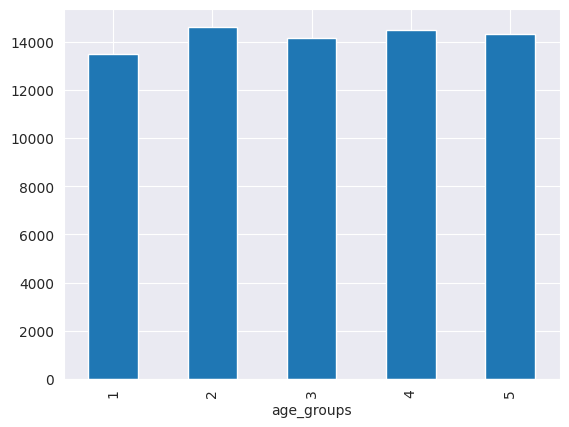

In [21]:
# Age ranges
age_col = sample["P208A"]
age_quantiles = dict(age_col.quantile([0.2, 0.4, 0.6, 0.8]))
age_selections = [
    (age_col >= 0) & (age_col < age_quantiles[0.2]),
    (age_col >= age_quantiles[0.2]) & (age_col < age_quantiles[0.4]),
    (age_col >= age_quantiles[0.4]) & (age_col < age_quantiles[0.6]),
    (age_col >= age_quantiles[0.6]) & (age_col < age_quantiles[0.8]),
    (age_col >= age_quantiles[0.8]),
]
age_choices = [1, 2, 3, 4, 5]
age_groups = np.select(age_selections, age_choices, default=0)
inputs["age_groups"] = pd.Categorical(age_groups.astype(int), ordered=True)
age_recode_counts = inputs["age_groups"].value_counts().sort_index(ascending=True)
age_recode_counts.plot(kind='bar')

np.average(age_col), np.std(age_col), np.min(age_col), np.max(age_col), age_quantiles

{0.1: 4.001432959586223,
 0.4: 4.392800445764366,
 0.6: 4.562649309073016,
 0.9: 4.891572997005581}

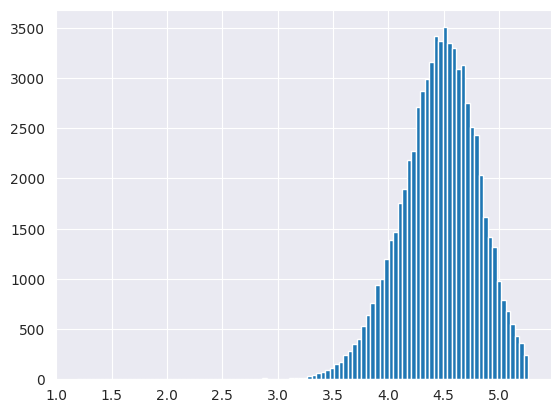

In [22]:
# Log income has normal looking distribution
income_col = inputs["log_income"]
# income_col = inputs["house_income"]
plt.hist(income_col, bins=100)
np.average(income_col), np.std(income_col), np.min(income_col), np.max(income_col)
dict(income_col.quantile([0.1, 0.4, 0.6, 0.9]))

<Axes: xlabel='region'>

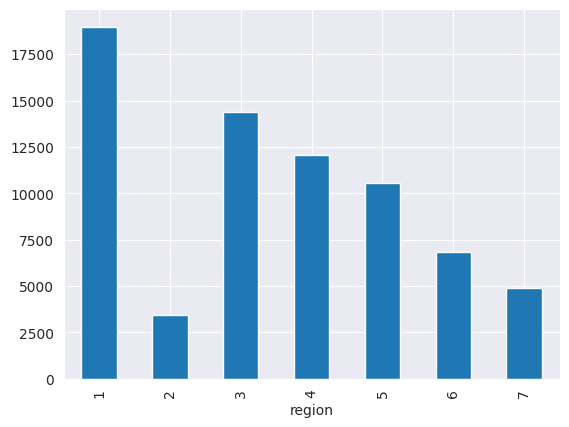

In [23]:
region_counts = inputs['region'].value_counts().sort_index(ascending=True)
region_counts.plot(kind='bar')

<Axes: xlabel='domain'>

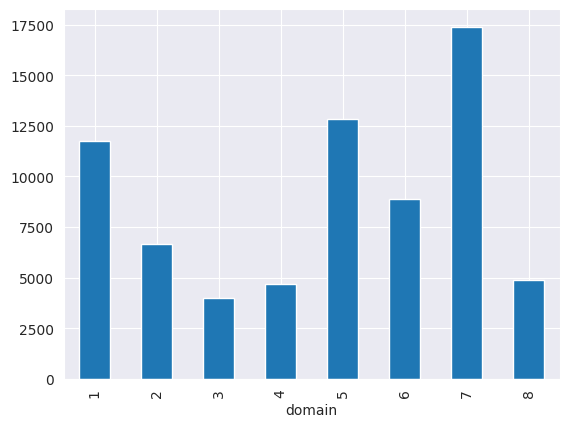

In [24]:
domain_counts = inputs['domain'].value_counts().sort_index(ascending=True)
domain_counts.plot(kind='bar')

<Axes: xlabel='social_level'>

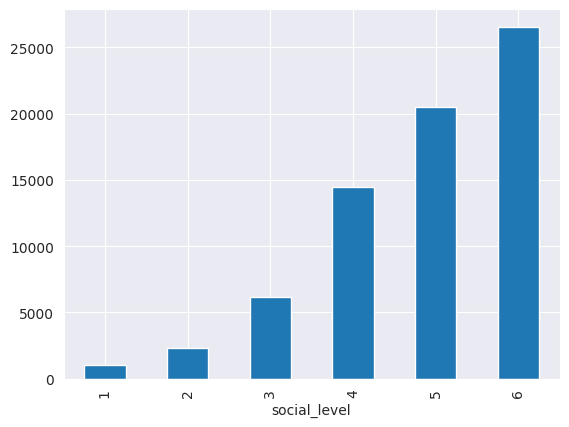

In [25]:
region_counts = inputs['social_level'].value_counts().sort_index(ascending=True)
region_counts.plot(kind='bar')

digital_poor
1    0.047603
2    0.264720
3    0.427555
4    0.260122
Name: count, dtype: float64

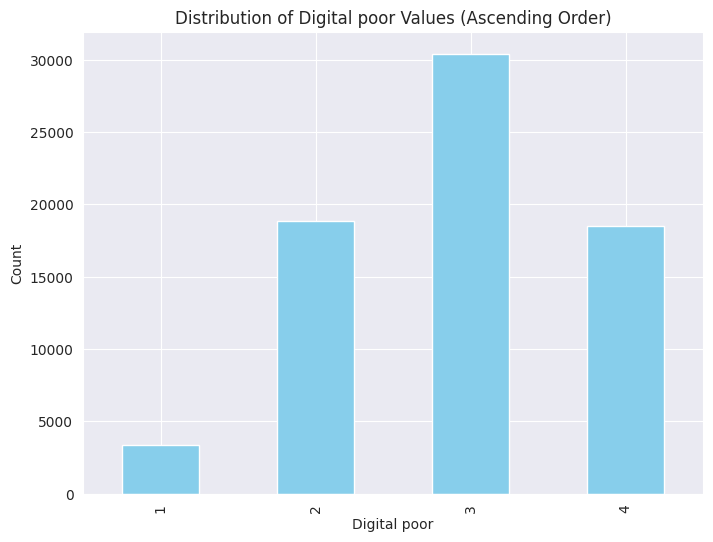

In [37]:
digital_poor_counts = inputs['digital_poor'].value_counts().sort_index(ascending=True)

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
digital_poor_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Digital poor')
plt.ylabel('Count')
plt.title('Distribution of Digital poor Values (Ascending Order)')
digital_poor_counts/len(digital_poor)


In [27]:
inputs

,house_income,log_income,rural,gender,age,education,electric_grid,social_level,domain,poor,digital_poor,region,educ_recode,illiterate,income_categories,age_groups
0,61138.316406,4.786313,1,1,43,8,2,4,7,3,3,5,5,1,5,3
1,61138.316406,4.786313,1,2,41,10,2,4,7,3,3,5,5,1,5,3
4,75288.875000,4.876731,1,1,60,4,2,4,7,3,3,5,2,1,5,4
5,75288.875000,4.876731,1,2,59,5,2,4,7,3,3,5,2,1,5,4
6,75288.875000,4.876731,1,1,38,6,2,4,7,3,3,5,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108346,26894.705078,4.429667,2,2,52,3,2,6,4,3,2,4,1,2,3,4
108350,9677.001953,3.985741,2,1,24,5,2,6,4,3,3,4,2,1,1,2
108351,15384.756836,4.187091,2,1,56,3,1,6,4,3,1,4,1,1,2,4
108352,15384.756836,4.187091,2,2,46,4,1,6,4,3,3,4,2,1,2,3


In [28]:
nans = {}
for col in inputs: 
    nans[col] = inputs[col].isnull().sum()
nans

{'house_income': 0,
 'log_income': 0,
 'rural': 0,
 'gender': 0,
 'age': 0,
 'education': 0,
 'electric_grid': 0,
 'social_level': 0,
 'domain': 0,
 'poor': 0,
 'digital_poor': 0,
 'region': 0,
 'educ_recode': 0,
 'illiterate': 0,
 'income_categories': 0,
 'age_groups': 0}

In [29]:
inputs.to_csv("/home/jj/enaho_sample.csv")

In [30]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
test_data = inputs.sample(1000)
mod_prob = OrderedModel(inputs['digital_poor'],
                        inputs[["income_categories", "age_groups", "educ_recode", "electric_grid", "domain"]],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 0.885206
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           digital_poor   Log-Likelihood:                -62946.
Model:                   OrderedModel   AIC:                         1.259e+05
Method:            Maximum Likelihood   BIC:                         1.260e+05
Date:                Fri, 26 Jul 2024                                         
Time:                        20:50:20                                         
No. Observations:               71109                                         
Df Residuals:                   71101                                         
Df Model:                           5                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
income_categories     0.3250      0.006     53.774      0.000       0.313       0.337
age_groups           -0.5982      0.006    -98.716      0.000      -0.610      -0.586
educ_recode           0.9084      0.007    122.872      0.000       0.894       0.923
electric_grid         1.2660      0.033     38.175      0.000       1.201       1.331
domain               -0.0505      0.003    -15.258      0.000      -0.057      -0.044
1/2                  -0.6225      0.070     -8.860      0.000      -0.760      -0.485
2/3                   1.1466      0.007    166.297      0.000       1.133       1.160
3/4                   1.1221      0.005    206.331      0.000       1.111       1.133
=====================================================================================
"""

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(test_data[["digital_poor", "log_income", "age", "education", "electric_grid", "region"]])
pca.singular_values_

array([603.76738772,  71.24765056,  57.07580149,  19.60780542,
         9.90013757,   7.27917365])

In [32]:
# formula = "digital_poor ~ log_income + age + education + (1 | region)"
# model = OrderedModel.from_formula(formula, data=inputs)
# model_fit = model.fit()
# model_fit.summary()
# coef_table = res_prob.params.to_frame().reset_index()
# coef_table.columns = ['Threshold', 'Coef.']
# coef_table

In [33]:
# predicted_probs = res_prob.predict()
# predicted_probs

In [34]:
# res_prob.get_margeff()

In [35]:
import scipy.stats as stats
# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# List of categorical variables
cat_vars = ['rural', 'gender', 'electric_grid', 'social_level', 'domain', 'poor',
            'digital_poor', 'region', 'educ_recode', 'illiterate', 'income_categories', 'age_groups']

cramer_v_matrix = pd.DataFrame(index=cat_vars, columns=cat_vars)

# Calculate Cramer's V for each pair of categorical variables
for var1 in cat_vars:
    for var2 in cat_vars:
        if var1 != var2:
            cramer_v_matrix.loc[var1, var2] = cramers_v(inputs[var1], inputs[var2])
        else:
            cramer_v_matrix.loc[var1, var2] = np.nan

# Print the matrix of Cramer's V values
cramer_v_matrix

,rural,gender,electric_grid,social_level,domain,poor,digital_poor,region,educ_recode,illiterate,income_categories,age_groups
rural,NaN,0.018338,0.310929,0.876164,0.347805,0.218224,0.341712,0.999965,0.336418,0.180072,0.363828,0.050141
gender,0.018338,NaN,0.019496,0.020608,0.019924,0.004068,0.061603,0.031418,0.141412,0.143497,0.030119,0.040393
electric_grid,0.310929,0.019496,NaN,0.277471,0.183627,0.179459,0.292494,0.374428,0.161578,0.100821,0.202373,0.020013
social_level,0.876164,0.020608,0.277471,NaN,0.216474,0.186421,0.223261,0.414607,0.203161,0.192355,0.221944,0.059679
domain,0.347805,0.019924,0.183627,0.216474,NaN,0.14598,0.162042,0.709915,0.11561,0.14014,0.155213,0.042922
poor,0.218224,0.004068,0.179459,0.186421,0.14598,NaN,0.18244,0.184331,0.168294,0.118899,0.27844,0.054344
digital_poor,0.341712,0.061603,0.292494,0.223261,0.162042,0.18244,NaN,0.230576,0.391841,0.395275,0.25338,0.297622
region,0.999965,0.031418,0.374428,0.414607,0.709915,0.184331,0.230576,NaN,0.182624,0.208531,0.211024,0.048666
educ_recode,0.336418,0.141412,0.161578,0.203161,0.11561,0.168294,0.391841,0.182624,NaN,0.599555,0.217596,0.262572
illiterate,0.180072,0.143497,0.100821,0.192355,0.14014,0.118899,0.395275,0.208531,0.599555,NaN,0.23643,0.277581
